# Пометка по поводу данных:

Где возможно и уместно, данные были собраны из первоисточников, т.к. сайты агрегаторы, которые я изначально планировал использовать (steamdb, sensortower, etc.) в той или иной мере защищены от скрейпинга и выдавали Error:403 

Обойти такую защиту как cloudflare, конечно, можно, но не знаю на сколько это было бы уместно и заняло бы больше времени 

In [1]:
import pandas as pd
from pymongo import MongoClient
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
client = MongoClient('-----')

db = client.RTS_games

steam_data = list(db.Steam.find())
android_data = list(db.Android.find())
ps4_data = list(db.PS4.find())
xbox_data = list(db.Xbox.find())
switch_data = list(db.Switch.find())

In [3]:
steam_df = pd.DataFrame(steam_data)
android_df = pd.DataFrame(android_data)
ps4_df = pd.DataFrame(ps4_data)
xbox_df = pd.DataFrame(xbox_data)
switch_df = pd.DataFrame(switch_data)

In [4]:
rts_df = pd.concat([steam_df, android_df, ps4_df, xbox_df, switch_df])

rts_df

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
0,643f06d1e07a6c65357cedaf,Act of Aggression - Reboot Edition,Eugen Systems,Eugen Systems,"2 Sep, 2015",70,2262,158340,PC,Not Specified,19-04-2023
1,643f06d2e07a6c65357cedb0,Dummynation,Alejandro Hernández Ferrero,Alejandro Hernández Ferrero,"15 Apr, 2022",79,332,23240,PC,Not Specified,19-04-2023
2,643f06d2e07a6c65357cedb1,STAR WARS™ Rebellion,Coolhand Interactive,LucasArts,"28 Feb, 1998",100,917,64190,PC,Not Specified,19-04-2023
3,643f06d2e07a6c65357cedb2,Castle Story,Sauropod Studio,Sauropod Studio,"17 Aug, 2017",78,7518,526260,PC,Not Specified,19-04-2023
4,643f06d2e07a6c65357cedb3,DEFCON,Introversion Software,Introversion Software,"29 Sep, 2006",84,2892,202440,PC,Not Specified,19-04-2023
...,...,...,...,...,...,...,...,...,...,...,...
0,643f1810ff55576381418dfe,Fire Emblem Warriors: Three Hopes,Nintendo,[Nintendo],"Jun 24, 2022",89,683,4781000,Switch,Not Specified,19-04-2023
1,643f1810ff55576381418dff,The DioField Chronicle,Square Enix,"[Square Enix, Gamestop]","Sep 22, 2022",47,67,469000,Switch,Not Specified,19-04-2023
2,643f1810ff55576381418e00,Smelter,X Plus,[DANGEN Entertainment],"Apr 22, 2021",68,4,28000,Switch,Not Specified,19-04-2023
3,643f1811ff55576381418e01,Pokemon UNITE,Tencent,[The Pokemon Company],"Jul 21, 2021",38,325,2275000,Switch,Not Specified,19-04-2023


In [5]:
rts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 4
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              352 non-null    object
 1   game_name        352 non-null    object
 2   developer        352 non-null    object
 3   publisher        352 non-null    object
 4   release_date     352 non-null    object
 5   rating           352 non-null    int64 
 6   num_reviews      352 non-null    int64 
 7   apprx_downloads  352 non-null    int64 
 8   platform         352 non-null    object
 9   style            352 non-null    object
 10  date_scraped     352 non-null    object
dtypes: int64(3), object(8)
memory usage: 33.0+ KB


In [6]:
rts_df.describe()

,rating,num_reviews,apprx_downloads
count,352.000000,3.520000e+02,3.520000e+02
mean,78.650568,2.696717e+04,1.149520e+07
std,14.881107,1.600248e+05,6.090150e+07
min,21.000000,4.000000e+00,3.010000e+03
25%,70.750000,3.302500e+02,1.111425e+05
50%,83.000000,2.706000e+03,3.390800e+05
75%,90.000000,8.964750e+03,1.786206e+06
max,100.000000,1.966771e+06,7.295974e+08


In [7]:
def convert_to_datetime(date_str):
    return pd.to_datetime(date_str).date().strftime('%d-%m-%Y')

rts_df.loc[rts_df['release_date'] != 'No Data', 'release_date'] = rts_df.loc[rts_df['release_date'] != 'No Data'
                                                                       , 'release_date'].apply(convert_to_datetime)

In [8]:
rts_df

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
0,643f06d1e07a6c65357cedaf,Act of Aggression - Reboot Edition,Eugen Systems,Eugen Systems,02-09-2015,70,2262,158340,PC,Not Specified,19-04-2023
1,643f06d2e07a6c65357cedb0,Dummynation,Alejandro Hernández Ferrero,Alejandro Hernández Ferrero,15-04-2022,79,332,23240,PC,Not Specified,19-04-2023
2,643f06d2e07a6c65357cedb1,STAR WARS™ Rebellion,Coolhand Interactive,LucasArts,28-02-1998,100,917,64190,PC,Not Specified,19-04-2023
3,643f06d2e07a6c65357cedb2,Castle Story,Sauropod Studio,Sauropod Studio,17-08-2017,78,7518,526260,PC,Not Specified,19-04-2023
4,643f06d2e07a6c65357cedb3,DEFCON,Introversion Software,Introversion Software,29-09-2006,84,2892,202440,PC,Not Specified,19-04-2023
...,...,...,...,...,...,...,...,...,...,...,...
0,643f1810ff55576381418dfe,Fire Emblem Warriors: Three Hopes,Nintendo,[Nintendo],24-06-2022,89,683,4781000,Switch,Not Specified,19-04-2023
1,643f1810ff55576381418dff,The DioField Chronicle,Square Enix,"[Square Enix, Gamestop]",22-09-2022,47,67,469000,Switch,Not Specified,19-04-2023
2,643f1810ff55576381418e00,Smelter,X Plus,[DANGEN Entertainment],22-04-2021,68,4,28000,Switch,Not Specified,19-04-2023
3,643f1811ff55576381418e01,Pokemon UNITE,Tencent,[The Pokemon Company],21-07-2021,38,325,2275000,Switch,Not Specified,19-04-2023


In [9]:
rts_df.loc[rts_df['release_date'] == 'No Data', 'release_date'] = pd.NA

In [10]:
rts_df.loc[rts_df['num_reviews'] == rts_df['num_reviews'].min()]

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
3,643f17c258066319311ce425,Hell Warders,Ares Games,[PQube],21-02-2019,43,4,28000,PS4,Not Specified,19-04-2023
6,643f17c458066319311ce428,Lock's Quest,Digital Continue,[THQ Nordic],30-05-2017,35,4,28000,PS4,Not Specified,19-04-2023
6,643f17f69c5cb3b8c39fea6c,Constructor,System 3,"[Deep Silver, System ]",25-07-2017,43,4,28000,Xbox One,Not Specified,19-04-2023
20,643f17f99c5cb3b8c39fea7a,Anarcute,Anarteam,[Anarteam],12-07-2016,73,4,28000,Xbox One,Not Specified,19-04-2023
2,643f1810ff55576381418e00,Smelter,X Plus,[DANGEN Entertainment],22-04-2021,68,4,28000,Switch,Not Specified,19-04-2023


In [11]:
rts_df.loc[rts_df['release_date'].isna()]

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
110,643f075328dbe07de041cb18,Stronghold 2: Steam Edition,FireFly Studios,FireFly Studios,<NA>,90,3502,245140,PC,Not Specified,19-04-2023


In [12]:
rts_df_sorted = rts_df.sort_values(['apprx_downloads', 'rating','num_reviews','release_date'], 
                                   ascending=[False, False, False, False])

rts_df_sorted

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
66,643f176cdeecb158bf0b8e9d,Clash of Clans,Supercell,Supercell,30-09-2013,91,1966771,729597384,Android,Stylized,19-04-2023
58,643f1765deecb158bf0b8e95,Clash Royale,Supercell,Supercell,01-03-2016,86,917583,486746044,Android,Stylized,19-04-2023
0,643f172edeecb158bf0b8e5b,Plants vs. Zombies™,ELECTRONIC ARTS,ELECTRONIC ARTS,13-11-2014,83,113118,468250576,Android,Stylized,19-04-2023
23,643f1744deecb158bf0b8e72,Lords Mobile: Kingdom Wars,IGG.COM,IGG.COM,21-03-2016,87,155542,445155349,Android,Stylized,19-04-2023
67,643f176ddeecb158bf0b8e9e,Stick War: Legacy,Max Games Studios,Max Games Studios,31-01-2016,93,59867,228093066,Android,Stylized,19-04-2023
...,...,...,...,...,...,...,...,...,...,...,...
10,643f06d3e07a6c65357cedb9,Territory: Farming and Fighting,Wit Studio,Wit Studio,11-01-2023,72,175,12250,PC,Not Specified,19-04-2023
42,643f074b28dbe07de041cad4,Territory: Farming and Fighting,Wit Studio,Wit Studio,11-01-2023,72,175,12250,PC,Not Specified,19-04-2023
15,643f074628dbe07de041cab9,Nuclear War Simulator,Bit Mirror,Slitherine Ltd.,02-02-2023,45,100,7000,PC,Not Specified,19-04-2023
6,643f06d2e07a6c65357cedb5,Role of Hex,Verde,Verde,20-02-2023,92,43,3010,PC,Not Specified,19-04-2023


In [13]:
top_150 = rts_df_sorted.head(150)

top_150

,_id,game_name,developer,publisher,release_date,rating,num_reviews,apprx_downloads,platform,style,date_scraped
66,643f176cdeecb158bf0b8e9d,Clash of Clans,Supercell,Supercell,30-09-2013,91,1966771,729597384,Android,Stylized,19-04-2023
58,643f1765deecb158bf0b8e95,Clash Royale,Supercell,Supercell,01-03-2016,86,917583,486746044,Android,Stylized,19-04-2023
0,643f172edeecb158bf0b8e5b,Plants vs. Zombies™,ELECTRONIC ARTS,ELECTRONIC ARTS,13-11-2014,83,113118,468250576,Android,Stylized,19-04-2023
23,643f1744deecb158bf0b8e72,Lords Mobile: Kingdom Wars,IGG.COM,IGG.COM,21-03-2016,87,155542,445155349,Android,Stylized,19-04-2023
67,643f176ddeecb158bf0b8e9e,Stick War: Legacy,Max Games Studios,Max Games Studios,31-01-2016,93,59867,228093066,Android,Stylized,19-04-2023
...,...,...,...,...,...,...,...,...,...,...,...
3,643f06d2e07a6c65357cedb2,Castle Story,Sauropod Studio,Sauropod Studio,17-08-2017,78,7518,526260,PC,Not Specified,19-04-2023
35,643f074928dbe07de041cacd,Castle Story,Sauropod Studio,Sauropod Studio,17-08-2017,78,7518,526260,PC,Not Specified,19-04-2023
32,643f074928dbe07de041caca,Door Kickers,KillHouse Games,KillHouse Games,20-10-2014,94,7457,521990,PC,Not Specified,19-04-2023
174,643f1635b3b00f69220788c1,Supreme Commander 2,Gas Powered Games,Square Enix,01-03-2010,89,7119,498330,PC,Not Specified,19-04-2023


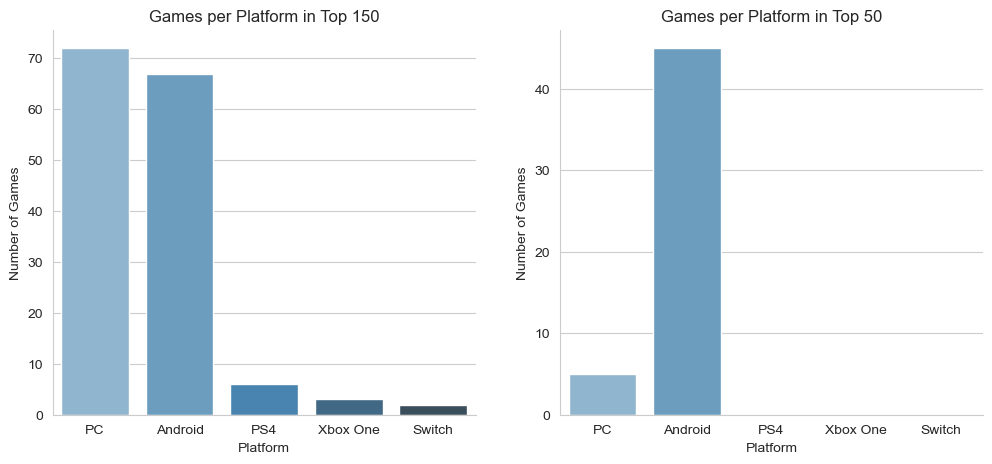

In [14]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
ax1 = sns.countplot(x="platform", data=top_150, palette="Blues_d",
              order=top_150['platform'].value_counts().index)

sns.despine(right = True, top = True)

plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Games per Platform in Top 150')


plt.subplot(1,2,2) 

ax2 = sns.countplot(x="platform", data=top_150.head(50), palette="Blues_d",
              order=top_150['platform'].value_counts().index)

sns.despine(right = True, top = True)

plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Games per Platform in Top 50')

plt.show()

Как видим, около 90% игр из топ 150 это игры на ПК или Андроиде (с небольшим перевесом в сторону ПК), однако, если взять топ 50 то уже 90% игр являются Андроидовскими 

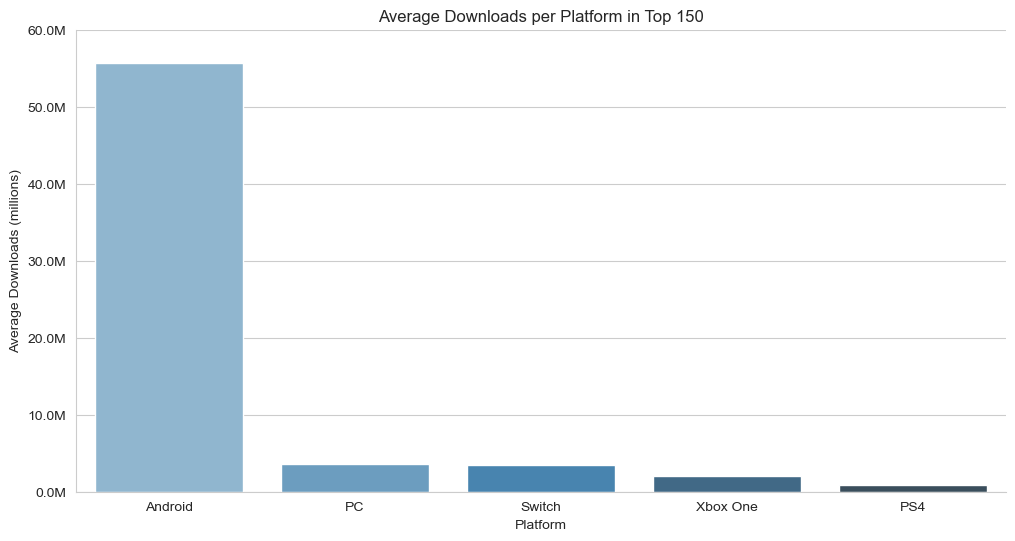

In [16]:
avg_downloads = top_150.groupby('platform')['apprx_downloads'].mean().sort_values(ascending=False)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_downloads.index, y=avg_downloads.values, palette='Blues_d')
sns.despine(right=True, top=True)
plt.xlabel('Platform')
plt.ylabel('Average Downloads (millions)')
plt.title('Average Downloads per Platform in Top 150')

plt.yticks(ax.get_yticks(), ['{:.1f}M'.format(x/1000000) for x in ax.get_yticks()])

plt.show()


По среднему количеству загрузок на игру, видим, что ни одна другая платформа не может конкурировать с Андроидом, которые превышает все другие платформы вместе взятые в более чем 5 раз по среднему количеству загрузок

Однко стоит учитывать, что реальные данные из всех выше укзанных платформ есть только от Google Play Store, то бишь только для Андроида

In [17]:
top_150.to_excel('top_150_RTS_Komko.xlsx', index=False)